## DNA File Handling, Cleaning, and Nucleotide Analysis with Pandas & Matplotlib 
Wrote a custom DNA file using Python file handling, then created modular functions for file parsing, sequence cleaning, GC calculation, and nucleotide counting. 

Processed the file through these functions to obtain clean, analyzable sequences and saved the cleaned output back into a new file.

Using Pandas, loaded the data into a DataFrame, applied the GC-content and sequence-length calculations with the apply() method. 

Finally visualized total nucleotide counts across all sequences using Matplotlib bar charts — demonstrating data cleaning, transformation, and visualization workflow end-to-end.

Exercise 3 – Multi-Function Sequence Analysis

You are given a FASTA file called practice3.fasta containing 3 DNA sequences from different organisms.

Tasks:

1. Parse the FASTA file into a dictionary.


2. Clean each sequence (remove anything not A, T, G, C).


3. For each sequence:

Calculate the GC content percentage.

Count each nucleotide using the manual dictionary method.

Print results in the format:

Header: <header>
Length: <length>
GC%: <gc_percent>
Counts: {'A': x, 'T': y, 'G': z, 'C': w}



4. Finally, create one bar chart showing the total nucleotide counts across all sequences combined (x-axis: nucleotides, y-axis: total counts).



Bonus:

Save the cleaned sequences into a new FASTA file called practice3_cleaned.fasta.


In [3]:
Data = """
>Human_sequence
ATGCTAGCTAGCTAACGNNNATGCTAGCTAGCTGAC
>Mouse_sequence
TTGCGCGGATCGTAGCTAGCTAGCTAGCTAATGCXTA
>Plant_sequence
GCTAGCTAGCATCGATCGTATAGCTAGCTAGCNNN"""

with open("practice3.txt", "w") as file:
    file.write(Data)

In [3]:
def fasta_parsing(practice3txt):
    fasta_dict= {}
    with open("practice3.txt", "r") as file:
        header= None
        sequence_lines= []
        for line in file:
            line= line.strip()
            if line.startswith('>'):
                if header:
                    fasta_dict[header]="".join(sequence_lines)
                header= line[1:]
                sequence_lines= []
            else:
                sequence_lines.append(line)
        if header:
            fasta_dict[header]= "".join(sequence_lines)
        return fasta_dict


def clean(seq):
    cleaned_sequence= "".join([base for base in seq.upper() if base in 'ATGC'])
    return cleaned_sequence

def calculate_gc(seq):
    gc = 0
    for base in seq:
        if base in 'GC':
            gc += 1
    gc_percent= round(gc/len(seq) * 100, 2) if len(seq) > 0 else 0
    return gc_percent

def nucleotides_count(seq):
    base_count= {'A':0, 'T':0, 'G':0, 'C':0}
    for base in seq:
        if base in base_count:
            base_count[base] += 1
    return base_count


sequences= fasta_parsing("practice3.txt")

clean_sequence= {}
for header, seq in sequences.items():
    clean_sequence[header]= clean(seq)


for header, seq in clean_sequence.items():
    gc_percent = calculate_gc(seq)
    length= len(seq)
    counts= nucleotides_count(seq)
    print(f"Header: <{header}>\nLength: <{length}>\nGC%: <{gc_percent}>\n",
          f"Counts: {counts}")

with open("practice3_cleaned.fasta", "w") as file:
    for header, seq in clean_sequence.items():
        file.write(f">{header}\n{seq}\n")
  
        

Header: <Human_sequence>
Length: <33>
GC%: <48.48>
 Counts: {'A': 9, 'T': 8, 'G': 8, 'C': 8}
Header: <Mouse_sequence>
Length: <36>
GC%: <50.0>
 Counts: {'A': 8, 'T': 10, 'G': 10, 'C': 8}
Header: <Plant_sequence>
Length: <32>
GC%: <50.0>
 Counts: {'A': 8, 'T': 8, 'G': 8, 'C': 8}


In [3]:
import pandas as pd
df= pd.DataFrame(list(clean_sequence.items()), columns= ['Header', 'Sequence'])

# to add more columns to my dataframe
df['Length']= df['Sequence'].apply(len)
df['GC_Content(%)']= df['Sequence'].apply(lambda seq: calculate_gc(seq))

print(df.head())


            

           Header                              Sequence  Length  GC_Content(%)
0  Human_sequence     ATGCTAGCTAGCTAACGATGCTAGCTAGCTGAC      33          48.48
1  Mouse_sequence  TTGCGCGGATCGTAGCTAGCTAGCTAGCTAATGCTA      36          50.00
2  Plant_sequence      GCTAGCTAGCATCGATCGTATAGCTAGCTAGC      32          50.00


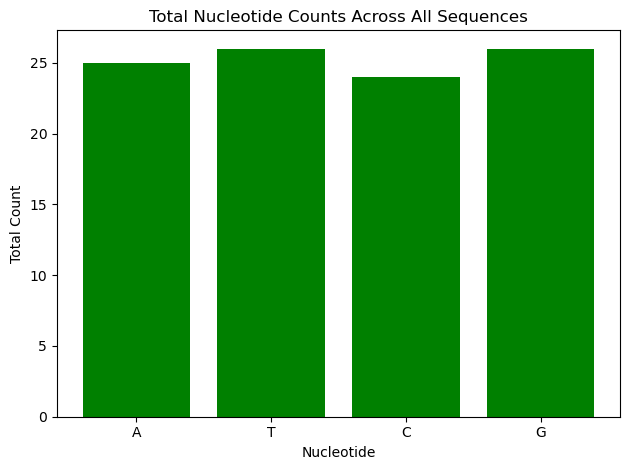

In [7]:
import matplotlib.pyplot as plt

total_counts= {'A':0, 'T':0, 'C':0, 'G':0}
for seq in clean_sequence.values():
    counts= nucleotides_count(seq)
    for base, count in counts.items():
        total_counts[base] +=count

nucleotides= list(total_counts.keys())
total_counts_of_nucleotides= list(total_counts.values())

plt.bar(nucleotides, total_counts_of_nucleotides, color= 'green')
plt.title('Total Nucleotide Counts Across All Sequences')
plt.xlabel('Nucleotide')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()
          